In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn

from sklearn.neural_network import MLPClassifier
from sklearn.neural_network import MLPRegressor

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.metrics import r2_score

In [15]:
col_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'diabetes']
dataset = pd.read_csv('data/pima-indians-diabetes.csv', header=None, names=col_names)
print(dataset.shape)
dataset.describe().transpose()

(768, 9)


,count,mean,std,min,25%,50%,75%,max
pregnant,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
bp,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
skin,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
bmi,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
pedigree,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
diabetes,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [16]:
target_column = ['diabetes']
predictors = list(set(list(dataset.columns))-set(target_column))
dataset[predictors] = dataset[predictors]/dataset[predictors].max()
dataset.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
pregnant,768.0,0.226180,0.198210,0.000000,0.058824,0.176471,0.352941,1.0
glucose,768.0,0.607510,0.160666,0.000000,0.497487,0.587940,0.704774,1.0
bp,768.0,0.566438,0.158654,0.000000,0.508197,0.590164,0.655738,1.0
skin,768.0,0.207439,0.161134,0.000000,0.000000,0.232323,0.323232,1.0
insulin,768.0,0.094326,0.136222,0.000000,0.000000,0.036052,0.150414,1.0
bmi,768.0,0.476790,0.117499,0.000000,0.406855,0.476900,0.545455,1.0
pedigree,768.0,0.194990,0.136913,0.032231,0.100723,0.153926,0.258781,1.0
age,768.0,0.410381,0.145188,0.259259,0.296296,0.358025,0.506173,1.0
diabetes,768.0,0.348958,0.476951,0.000000,0.000000,0.000000,1.000000,1.0


In [22]:
X = dataset[predictors].values
y = dataset[predictors].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 40)
print(X_train.shape); print(X_test.shape)

(537, 8)
(231, 8)


In [25]:
X_train = dataset.iloc[:,0:-1].values
y_train = dataset.iloc[:,-1].values

In [32]:
#Importing MLPClassifier
from sklearn.neural_network import MLPClassifier

#Initializing the MLPClassifier
classifier = MLPClassifier(hidden_layer_sizes=(8,8,8), max_iter=500, activation = 'relu',solver='adam',random_state=1)

classifier.fit(X_train, y_train)

predict_train = classifier.predict(X_train)
predict_test = classifier.predict(X_test)

In [33]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_train, predict_train))
print(classification_report(y_train, predict_train))

[[439  61]
 [103 165]]
              precision    recall  f1-score   support

           0       0.81      0.88      0.84       500
           1       0.73      0.62      0.67       268

    accuracy                           0.79       768
   macro avg       0.77      0.75      0.76       768
weighted avg       0.78      0.79      0.78       768



In [36]:
from sklearn.neural_network import MLPRegressor
import numpy as np

## Questionaire data (WEEK, YEARS, BOOKS, PROJECTS, EARN, RATING)
Q = [[20,  11,  20,  30,  4000,  3000],
     [12,   4,   0,   0, 1000,  1500],
     [2,   0,   1,  10,   0,  1400],
     [35,   5,  10,  70,  6000,  3800],
     [30,   1,   4,  65,   0,  3900],
     [35,   1,   0,   0,   0, 100],
     [15,   1,   2,  25,   0,  3700],
     [40,   3,  -1,  60,  1000,  2000],
     [40,   1,   2,  95,   0,  1000],
     [10,   0,   0,   0,   0,  1400],
     [30,   1,   0,  50,   0,  1700],
     [1,   0,   0,  45,   0,  1762],
     [10,  32,  10,   5,   0,  2400],
     [5,  35,   4,   0, 13000,  3900],
     [8,   9,  40,  30,  1000,  2625],
     [1,   0,   1,   0,   0,  1900],
     [1,  30,  10,   0,  1000,  1900],
     [7,  16,   5,   0,   0,  3000]]

In [37]:
X = np.array(Q)

In [38]:
X

array([[   20,    11,    20,    30,  4000,  3000],
       [   12,     4,     0,     0,  1000,  1500],
       [    2,     0,     1,    10,     0,  1400],
       [   35,     5,    10,    70,  6000,  3800],
       [   30,     1,     4,    65,     0,  3900],
       [   35,     1,     0,     0,     0,   100],
       [   15,     1,     2,    25,     0,  3700],
       [   40,     3,    -1,    60,  1000,  2000],
       [   40,     1,     2,    95,     0,  1000],
       [   10,     0,     0,     0,     0,  1400],
       [   30,     1,     0,    50,     0,  1700],
       [    1,     0,     0,    45,     0,  1762],
       [   10,    32,    10,     5,     0,  2400],
       [    5,    35,     4,     0, 13000,  3900],
       [    8,     9,    40,    30,  1000,  2625],
       [    1,     0,     1,     0,     0,  1900],
       [    1,    30,    10,     0,  1000,  1900],
       [    7,    16,     5,     0,     0,  3000]])

In [39]:
neural_net = MLPRegressor(max_iter=2000).fit(X[:,:-1], X[:,-1])

C:\Users\ITU\anaconda\envs\tf\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [40]:
res = neural_net.predict([[0,0,0,0,0]])
print(res)

[85.48522748]


In [41]:
res = neural_net.predict([[20,0,0,0,0]])
print(res)

[413.86943455]


In [42]:
#Finxter rating'e göre 94 altı sıfır bilgiye karşılık düşüyor
#1500-1700 arası rating sahibi olmak ise ortalama Python bilgisini gösteriyor. 

In [43]:
res = neural_net.predict([[20,0,10,0,0]])
print(res)

[885.76196176]


In [45]:
res = neural_net.predict([[20, 1, 10, 0, 0]])
print(res)

[946.22062262]


In [47]:
res = neural_net.predict([[20, 1, 10, 50, 1000]])
print(res)

[2114.21277473]


In [48]:
#feed forward neural network 

import numpy as np
from sklearn import datasets

np.random.seed(0)

X, y = datasets.make_moons(200, noise = 0.20)

In [65]:
#neural network mimarisi
#input layer = 2 nöron
#hidden layer = 6 nöron
#output layer = 3 nöron 

input_dim = 2
output_dim = 3
hidden_dim = 6

W1 = np.random.randn(input_dim, hidden_dim) #2 X 6
b1 = np.zeros((1,hidden_dim))

print(W1)
print(b1)


W2 = np.random.randn(hidden_dim, hidden_dim) # 6 X 6
b2 = np.zeros((1,hidden_dim))

print(W2)
print(b2)

W3 = np.random.randn(hidden_dim, output_dim) #6 X 3
b3 = np.zeros((1,output_dim))


print(W3)
print(b3)



z1 = X.dot(W1) + b1 
a1 = np.tanh(z1)

print(z1)
print(a1)


z2 = a1.dot(W2) + b2 
a2 = np.tanh(z2)

print(z2)
print(a2)

z3 = a2.dot(W3) + b3 

print(z3)


exp_scores = np.exp(z3)
#print(exp_scores)
probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)
print(probs)

[[-0.37528101 -1.05286291  2.46290783  0.27664322  0.44059832 -0.7981917 ]
 [-0.2415865   0.34170485  0.26277799  0.02140013 -0.72346098  0.25635525]]
[[0. 0. 0. 0. 0. 0.]]
[[ 0.04473119  1.55296084  0.03924975 -1.0049745  -0.47965368  0.31977025]
 [-0.66616633 -0.2293022  -0.25284635 -1.51293894  0.65394709  1.02293582]
 [ 0.20880578  0.03756426  0.85038503 -0.07436801 -0.83157124 -1.84776384]
 [ 1.54259227 -1.63679323  0.45522959  0.52043535  0.55432505  1.01164178]
 [-0.08958394 -0.41382259 -0.67100639 -0.30700297 -0.68794773 -0.3374833 ]
 [-0.0434235  -1.22526907  0.69690366  0.5581072   0.75478982  0.46276529]]
[[0. 0. 0. 0. 0. 0.]]
[[-1.05108184 -0.93694423 -1.03292387]
 [-0.73507422 -0.11733996 -0.72190967]
 [-0.58468697  1.00017596  0.68962075]
 [ 0.70594056 -0.02435648  0.04371954]
 [ 0.71518059  0.1416329  -0.51817412]
 [-0.37625458  0.76018817 -0.22143915]]
[[0. 0. 0.]]
[[-3.91261554e-01 -6.23987372e-01  1.95317780e+00  2.15617196e-01
  -8.59297668e-03 -4.74307447e-01]
 [-4.

In [77]:
import tensorflow as tf 
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

mnist = keras.datasets.mnist

In [78]:
(x_train_full, y_train_full),(x_test, y_test) = mnist.load_data()

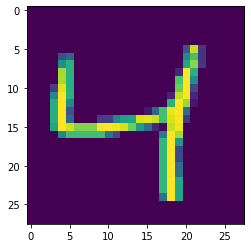

In [79]:
plt.imshow(x_train_full[2])

In [80]:
x_train_norm = x_train_full / 255
x_test_norm = x_test / 255

x_valid, x_train = x_train_norm[:5000], x_train_norm[5000:]
y_valid, y_train = x_train_full[:5000], y_train_full[5000:]

x_test = x_test_norm

np.random.seed(42)
tf.compat.v1.set_random_seed(42)

In [81]:
model = keras.models.Sequential()

model.add(keras.layers.Flatten(input_shape=[28,28]))
model.add(keras.layers.Dense(300, activation='relu'))
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

In [82]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 300)               235500    
_________________________________________________________________
dense_4 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_5 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [83]:
model.compile(loss="sparse_categorical_crossentropy", optimizer = "sgd", metrics=["accuracy"])

In [86]:
#modelin eğitimi
model_history = model.fit(x_train, y_train, epochs = 30, validation_data = (x_valid, y_valid))
model.evaluate(x_test, y_test)

Train on 55000 samples, validate on 5000 samples
Epoch 1/30
54688/55000 [============================>.] - ETA: 0s - loss: 0.2337 - acc: 0.9338

InvalidArgumentError: Can not squeeze dim[2], expected a dimension of 1, got 28
	 [[{{node metrics/acc/Squeeze}}]]

In [87]:
x_sample = x_test[:5]
y_prob = model.predict(x_sample)
y_prob.round()

array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [88]:
y_predict = model.predict_classes(x_sample)

In [89]:
y_predict

array([7, 2, 1, 0, 4], dtype=int64)

In [90]:
from sklearn.datasets import load_digits
digits = load_digits()

print(digits.data.shape)

(1797, 64)


<Figure size 432x288 with 0 Axes>

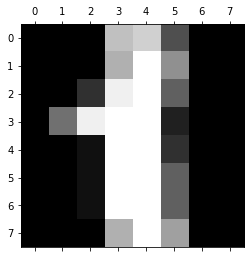

In [91]:
import matplotlib.pyplot as plt
plt.gray()
plt.matshow(digits.images[1])
plt.show()

In [92]:
digits.data[0,:]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [93]:
from sklearn.preprocessing import StandardScaler
X_scale = StandardScaler()
X = X_scale.fit_transform(digits.data)
X[0,:]

array([ 0.        , -0.33501649, -0.04308102,  0.27407152, -0.66447751,
       -0.84412939, -0.40972392, -0.12502292, -0.05907756, -0.62400926,
        0.4829745 ,  0.75962245, -0.05842586,  1.12772113,  0.87958306,
       -0.13043338, -0.04462507,  0.11144272,  0.89588044, -0.86066632,
       -1.14964846,  0.51547187,  1.90596347, -0.11422184, -0.03337973,
        0.48648928,  0.46988512, -1.49990136, -1.61406277,  0.07639777,
        1.54181413, -0.04723238,  0.        ,  0.76465553,  0.05263019,
       -1.44763006, -1.73666443,  0.04361588,  1.43955804,  0.        ,
       -0.06134367,  0.8105536 ,  0.63011714, -1.12245711, -1.06623158,
        0.66096475,  0.81845076, -0.08874162, -0.03543326,  0.74211893,
        1.15065212, -0.86867056,  0.11012973,  0.53761116, -0.75743581,
       -0.20978513, -0.02359646, -0.29908135,  0.08671869,  0.20829258,
       -0.36677122, -1.14664746, -0.5056698 , -0.19600752])

In [ ]:
from sklearn.model_selection import train_test_split
y = digits.target
X_train, X_test, y_train, Y_test = train_test_split(X, y, test_size = 0.4)